## 信用卡欺诈识别模型实验

本数据集由ULB ML Group 提供的欧洲持卡人的信用卡交易数据。此数据集总共包含284807个交易数据样本，其中欺诈样本的数据仅为492个，在整个数据集中仅占比0.17%，正常样本与欺诈样本的比例高达578：1.处于对用户个人信息的保护，此数据集包含的30维特征都经过主成分分析的转换。数据集原名为：Anolymized credit card transations labeled as fraudulent or genuine，来自kaggle.

In [60]:
import pandas as pd
data =pd.read_excel("日期.xlsx")
data.head()

,日期,报告结果数
0,202,80630
1,203,101503
2,204,91477
3,205,107134
4,206,153880


In [21]:
from collections import Counter
Counter(data["报告结果数"])

Counter({80630: 1,
         101503: 1,
         91477: 1,
         107134: 1,
         153880: 1,
         137586: 1,
         132726: 1,
         169484: 1,
         205880: 1,
         209609: 1,
         222197: 1,
         220950: 1,
         280622: 1,
         243964: 1,
         273727: 1,
         241489: 1,
         269929: 1,
         258038: 1,
         276404: 1,
         302348: 1,
         331844: 1,
         296968: 1,
         313220: 1,
         294687: 1,
         341314: 1,
         351663: 1,
         361908: 1,
         358176: 1,
         359679: 1,
         319698: 1,
         311018: 1,
         288228: 1,
         336236: 1,
         305372: 1,
         304830: 1,
         278826: 1,
         269885: 1,
         277471: 1,
         261521: 1,
         287836: 1,
         289721: 1,
         342003: 1,
         265238: 1,
         282327: 1,
         273306: 1,
         278731: 1,
         306356: 1,
         277576: 1,
         250674: 1,
         255907: 1,
  

这段代码使用了 seaborn 和 matplotlib 来创建一个散点矩阵图（Pair Plot），用于可视化数据集中的多个特征之间的关系。

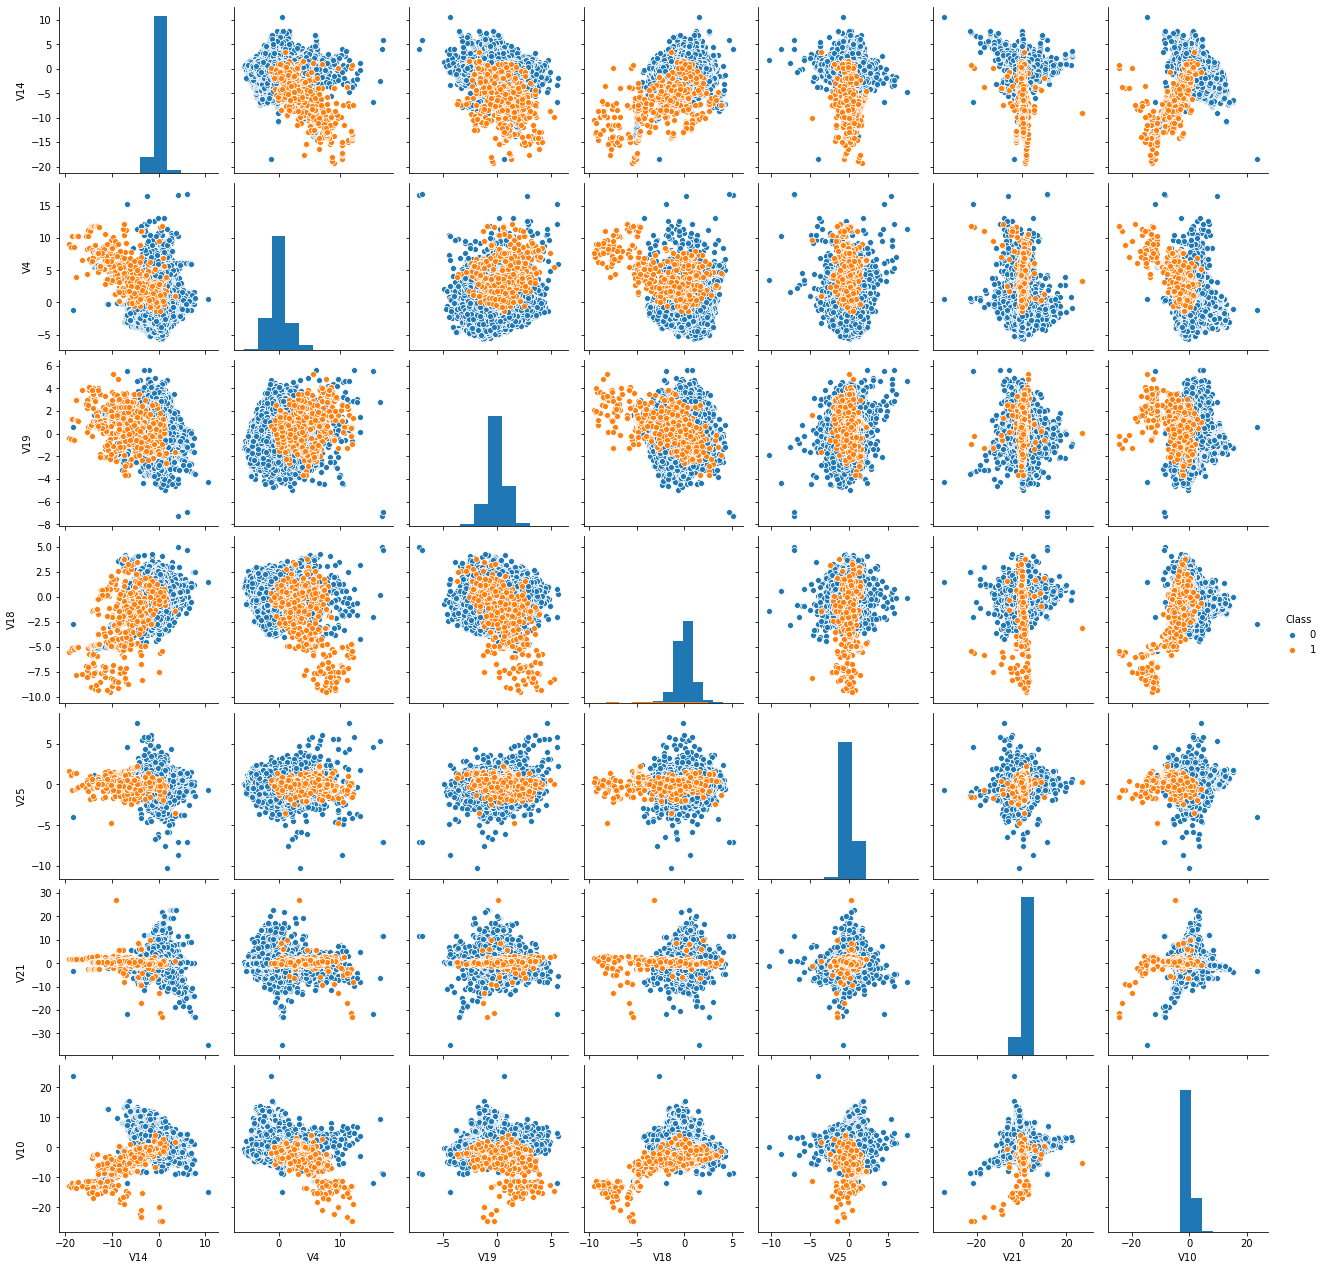

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=data[['V14', 'V4', 'V19','V18', 'V25', 'V21','V10'] + ['Class']], diag_kind='hist', hue= 'Class')
plt.show()

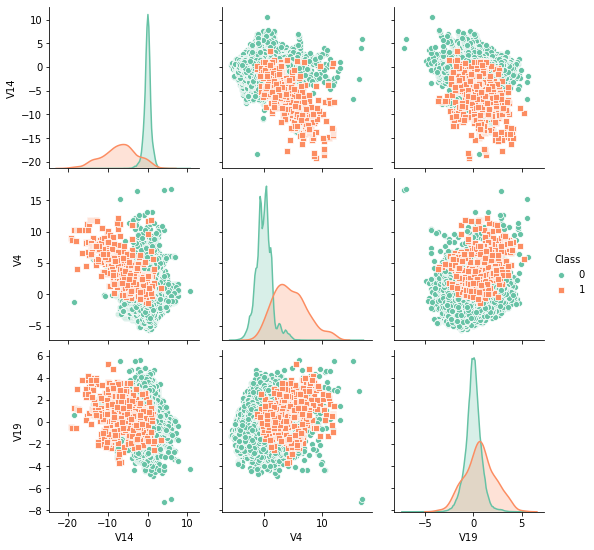

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=data[['V14', 'V4', 'V19','V18', 'V25', 'V21','V10'] + ['Class']], markers=["o", "s"], palette="Set2",kind="scatter", hue= 'Class')
plt.show()

这段代码使用了 Pandas 数据框 data 中的数据，绘制了一个包含多个直方图的图形，以可视化各个特征的分布情况。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222F19FC5C8>,
      dtype=object)

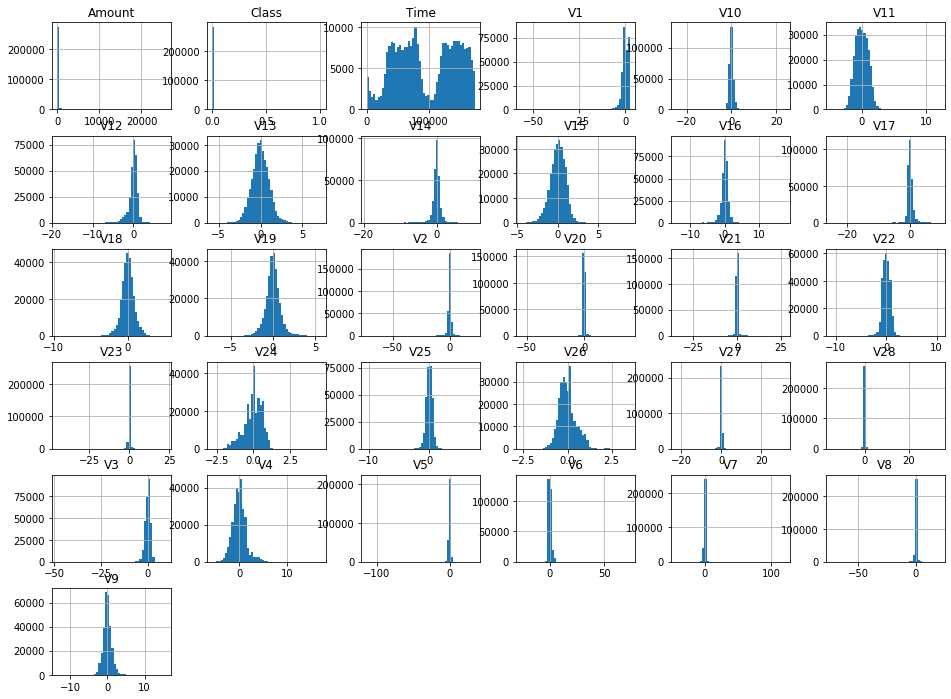

In [14]:
data.hist(bins=50, figsize=(16,12))

In [61]:
X = data.drop(columns="报告结果数")
y = data["报告结果数"]

In [62]:
#随机欠采样
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)
# X1, y1 = rus.fit_resample(X, y)
# print(sorted(Counter(y1).items()))

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [64]:
#使用imblearn进行随机过采样
# from imblearn.over_sampling import RandomOverSampler
# rus = RandomOverSampler(random_state=0)
# X_train, y_train = rus.fit_resample(X_train, y_train)

In [65]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)
# X_train, y_train = rus.fit_resample(X_train, y_train)

In [66]:
#print(sorted(Counter(y_train).items()))

In [67]:
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB #引入多项式和伯努利的贝叶斯
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
from sklearn.metrics import classification_report   #分类报告函数classification_report()
from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm               # svm函数需要的
import pandas as pd
import numpy as np                    # numpy科学计算库
from sklearn import model_selection   
import matplotlib.pyplot as plt       # 画图的库
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import mpld3
from sklearn import preprocessing
%matplotlib inline

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNetCV

In [70]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
# print('Boston数据线性回归模型的平均绝对误差为：',
#      mean_absolute_error(y_test,y_pred))
# print('Boston数据线性回归模型的均方误差为：',
#      mean_squared_error(y_test,y_pred))
# print('Boston数据线性回归模型的中值绝对误差为：',
#      median_absolute_error(y_test,y_pred))
# print('Boston数据线性回归模型的可解释方差值为：',
#      explained_variance_score(y_test,y_pred))
# print('Boston数据线性回归模型的R方值为：',
#      r2_score(y_test,y_pred))

In [73]:
# # 基准模型 
def benchmark(clf,name):
    print("分类器:",clf)
    model =clf
    # # 训练模型
    t_start = time()
    model.fit(X_train, y_train)
    t_end = time()
    t_train =t_end-t_start
    # # 模型预测 
    t_start = time()
    y_hat = model.predict(X_test)
    t_end = time()
    t_test = t_end -t_start
    print("测试时间：%.3f秒"%t_test)
     
    # # 模型评估 
    # # 训练集
    train_acc = explained_variance_score(y_train,
                                       model.predict(
                                           X_train))
    # # 测试集 
    test_acc =  explained_variance_score(y_test,y_hat)
    #zong=classification_report(y_test, y_hat)
    print("训练集准确率:%.2f%%"%(100*train_acc))
    print("测试集准确率:%.2f%%"%(100*test_acc))
    print(mean_squared_error(y_test, y_hat))

#     confusion_matrix_result = mean_squared_error(y_hat,y_test)
#     np.set_printoptions(precision=2)
#     confusion_matrix = confusion_matrix_result.astype('float') / confusion_matrix_result.sum(axis=1)[:, np.newaxis]
#     plt.figure(figsize=(8,6), dpi=80)
#     sns.heatmap(confusion_matrix,annot=True, cmap='Blues')
#     plt.xlabel('Predicted labels')
#     plt.ylabel('True labels')
# #print(confusion_matrix)
#     plt.show()
    
    # # 返回结果
    return t_train,t_test,1-train_acc,1-test_acc,name

In [74]:
from sklearn.linear_model import LogisticRegression
# # 不同分类器比较
print("分类器的比较:\n")
clfs = [
    #[RidgeClassifier(),'Ridge'],# 线性分类器-最小二乘+L2正则
    [LinearRegression(),'Linear'],# K临近
    [PolynomialFeatures(),'Polynomial'],# 朴素贝叶斯
    [DecisionTreeRegressor(random_state = 0),'DecisionTree'],# 随机森林
    [ElasticNetCV(),'ElasticNet'],# svm:采用svc(),损失是hinge损失的绝对值
    [XGBRegressor(
    n_estimators=1000, 
    max_depth=7, 
    eta=0.1, 
    subsample=0.7, 
    colsample_bytree=0.8,),'XGBoost'],
    
#     [LinearSVC(loss='squared_hinge',penalty='l1', # 线性可分支持向量积,平方Hinge损失+L1正则
#                dual=False,tol=1e-4),'LinearSVC-l1'],
#     [LinearSVC(loss='squared_hinge',penalty='l2', # 线性可分支持向量积,平方Hinge损失+L2正则
#                dual=False,tol=1e-4),'LinearSVC-l2']
     [RandomForestRegressor(
    n_estimators = 300, 
    random_state = 0
),'RandomForest'],
    [LassoCV(),'RandomForest']

]

# # 训练数据保存到列表
result = []
for clf,name in clfs:
    # 计算结果 
    a = benchmark(clf,name)
    result.append(a)
    print('\n')
# # 
result = np.array(result)

分类器的比较:

分类器: LinearRegression()
测试时间：0.002秒
训练集准确率:67.08%
测试集准确率:68.63%
3080162906.8161335


分类器: PolynomialFeatures()


AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

In [104]:
m=result
m

array([['0.010689020156860352', '4.55666971206665', '0.253315649867374',
        '0.3807099469821986', 'KNN'],
       ['0.4686717987060547', '0.9542105197906494',
        '0.0026525198938992522', '0.05243846775043015', 'AdaBoost'],
       ['1.268268346786499', '1.6658427715301514', '0.0',
        '0.0314946806643025', 'RandomForest'],
       ['0.0897974967956543', '10.775624990463257',
        '0.44694960212201595', '0.31935325304589024', 'SVM'],
       ['0.018358230590820312', '0.0645909309387207',
        '0.0954907161803713', '0.008900670622520312', 'BernoulliNB'],
       ['0.026180028915405273', '0.01784682273864746', '0.0',
        '0.11535760682560303', 'DecisionTree']], dtype='<U32')

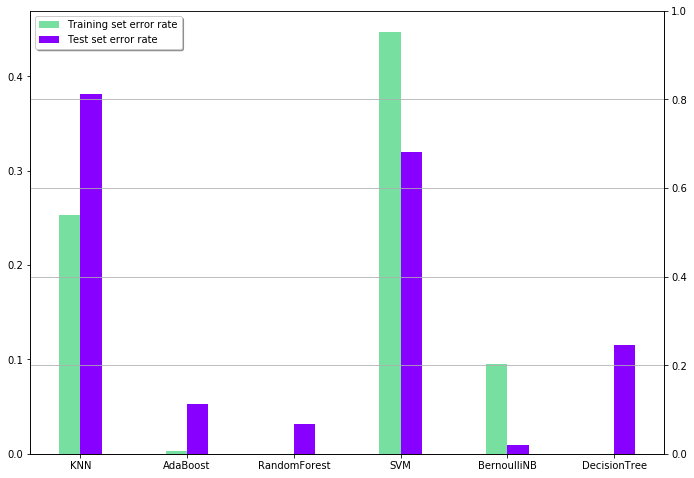

In [105]:

# 数据 
result = [[x[i] for x in m] for i in range(5)]
training_time,test_time,traning_err,test_err,clf_names =  result

#training_time = np.array(training_time).astype(np.float)
#test_time = np.array(test_time).astype(np.float)
traning_err = np.array(traning_err).astype(np.float)
test_err = np.array(test_err).astype(np.float)

# 可视化
x = np.arange(len(training_time))
plt.figure(figsize=(10,7),facecolor='w')
ax = plt.axes()
b0 = ax.bar(x+0.1,traning_err,width=0.2,color='#77E0A0')
b1 = ax.bar(x+0.3,test_err,width=0.2,color='#8800FF')
ax2 = ax.twinx()
plt.xticks(x+0.2,clf_names)
plt.legend([b0[0],b1[0]],("Training set error rate",
                            "Test set error rate"),
                                  loc = 'upper left',
                                  shadow = True)
#plt.title("酒店评论文本分类及不同分类器错误率比较",fontsize=18)
plt.xlabel("分类器名称")
plt.grid(True)
plt.tight_layout(2)
plt.show()

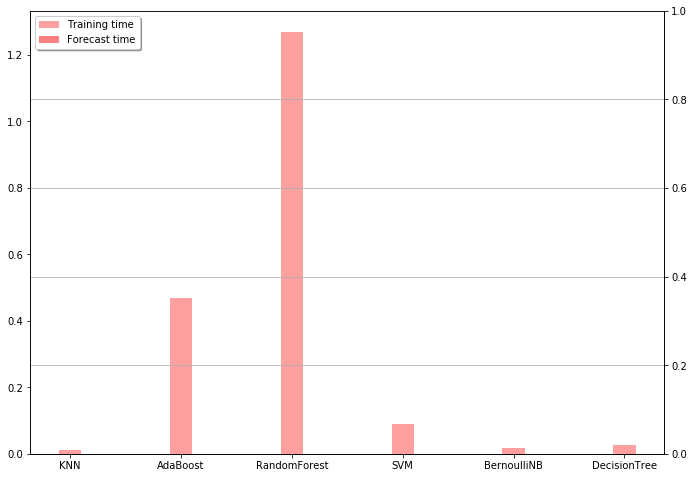

In [106]:
result = [[x[i] for x in m] for i in range(5)]
training_time,test_time,traning_err,test_err,clf_names =result
x = np.arange(len(training_time))
plt.figure(figsize=(10,7),facecolor='w')
ax = plt.axes()
training_time = np.array(training_time).astype(np.float)
test_time = np.array(test_time).astype(np.float)
b2 = ax.bar(x+0.1,training_time,width=0.2,color='#FFA0A0')
b3 = ax2.bar(x+0.3,test_time,width=0.2,color='#FF8080')
ax2 = ax.twinx()
plt.xticks(x+0.1,clf_names)
plt.legend([b2[0],b3[0]],(
                                  "Training time",
                                  "Forecast time"),
                                  loc = 'upper left',
                                  shadow = True)

#plt.title("酒店评论文本分类及不同分类器训练时间比较",fontsize=18)
plt.xlabel("分类器名称")
plt.grid(True)
plt.tight_layout(2)
plt.show()

### 数据分类严重不平衡，不平衡比达到 600:1

不平衡数据的识别难度很大，精确度和召回率很难达到平衡。负类识别精度低。一般用重采样、代价敏感学习来缓解。

接下来，对上述数据进行数据分析。一般有如下操作过程：

#### 数据划分、数据处理、特征工程、模型训练、模型评估、模型优化。

In [107]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=123)
clf.fit(X_train,y_train)
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(max_depth=3,random_state=123)
# model.fit(X_train,y_train)

AdaBoostClassifier(random_state=123)

In [26]:
clf.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=843828734),
 DecisionTreeClassifier(max_depth=1, random_state=914636141),
 DecisionTreeClassifier(max_depth=1, random_state=1228959102),
 DecisionTreeClassifier(max_depth=1, random_state=1840268610),
 DecisionTreeClassifier(max_depth=1, random_state=974319580),
 DecisionTreeClassifier(max_depth=1, random_state=819844194),
 DecisionTreeClassifier(max_depth=1, random_state=220395238),
 DecisionTreeClassifier(max_depth=1, random_state=941243409),
 DecisionTreeClassifier(max_depth=1, random_state=942612051),
 DecisionTreeClassifier(max_depth=1, random_state=2109339754),
 DecisionTreeClassifier(max_depth=1, random_state=1817228411),
 DecisionTreeClassifier(max_depth=1, random_state=1202710073),
 DecisionTreeClassifier(max_depth=1, random_state=2064866518),
 DecisionTreeClassifier(max_depth=1, random_state=1764906721),
 DecisionTreeClassifier(max_depth=1, random_state=793837664),
 DecisionTreeClassifier(max_depth=1, random_state=342284401),
 

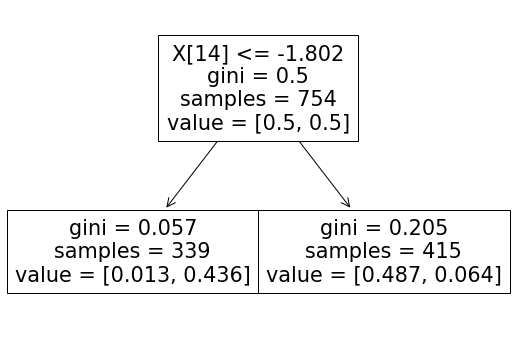

In [28]:
from sklearn import tree
plt.figure(figsize=(9,6))
_ = tree.plot_tree(clf[0])

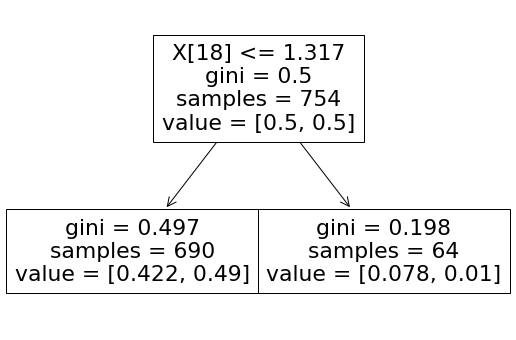

In [42]:
from sklearn import tree
plt.figure(figsize=(9,6))
_ = tree.plot_tree(clf[-1])

In [43]:
y_ = clf[-1].predict(X_train)
y_

C:\Users\叶\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

提取完特征变量后需要将数据拆分为训练集及测试集。划分训练集和测试集的代码如下：

### 2. 模型预测及评估

模型搭建完毕后，通过如下代码对测试集进行预测和评估

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
score1 = accuracy_score(y_pred, y_test)
score_roc_auc = roc_auc_score(y_test,y_pred_proba[:,1])
print("模型预测准确率=",score1)
print("模型预测的AUC值=",score_roc_auc)

模型预测准确率= 0.9475615322495698
模型预测的AUC值= 0.9823433763091013


In [36]:
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56847
           1       0.03      0.94      0.07       115

    accuracy                           0.95     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.95      0.97     56962



对于分类模型而言，我们不仅关心其预测的准确度，更关心下面两个指标： 命中率 (TPR)（所有实际营销失败中被预测为营销失败的比率） 和假警报率 (FPR)（所有实际营销成功的中被预测为营销失败的概率） 阈值(thres)。

也即通过两者绘制的ROC曲线来评判模型。

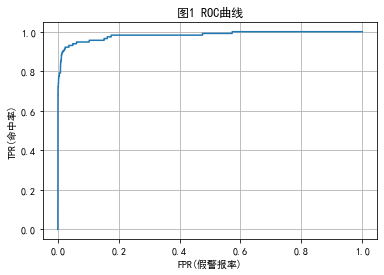

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])

import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"]   # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False     # 解决负号"-"显示为方块的问题

plt.plot(fpr,tpr)
plt.title("图1 ROC曲线")
plt.xlabel("FPR(假警报率)")
plt.ylabel("TPR(命中率)")
plt.grid()
plt.savefig(fname="案例4-ROC曲线.png",figsize=[10,10])
plt.show()

数值比较上可以使用AUC值来衡量模型的好坏，AUC值（Area Under Curver）指在曲线下面的面积，该面积的取值范围通常为0.5到1，0.5表示随机判断，1则代表完美的模型。因为这里的6个特征变量是案例事先筛选出的特征重要性较高的变量，所以该模型的ROC曲线会比较陡峭，且AUC值会较高。

在商业实战中： AUC值能达到0.75以上就已经可以接受了。 如果能达到0.85以上，则为非常不错的模型了

下面的代码可以绘制 **KS 曲线**。和ROC曲线一样，除了可视化的图形外，还需要一个可以量化的指标来衡量模型预测效果，与ROC曲线对应的是AUC值，而与KS曲线对应的则是KS值。KS值的计算公式如下：
$$KS = \max (TPR - FPR)$$

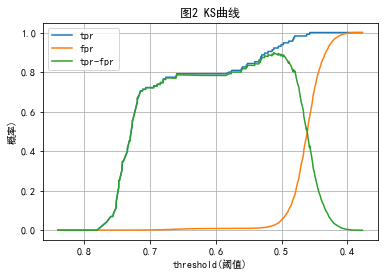

In [38]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"]   # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False     # 解决负号"-"显示为方块的问题

fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(thres[1:],tpr[1:])
plt.plot(thres[1:],fpr[1:])
plt.plot(thres[1:],tpr[1:]-fpr[1:])
plt.title("图2 KS曲线")
plt.xlabel("threshold(阈值)")
plt.ylabel("概率)")
plt.grid()
plt.legend(["tpr","fpr","tpr-fpr"])
plt.gca().invert_xaxis()
plt.savefig(fname="案例2-KS曲线.png",figsize=[10,10])
plt.show()

In [39]:
c = pd.DataFrame()
c["阈值"] = list(thres)
c["假警报率"] = list(fpr)
c["命中率"] = list(tpr)

c["TPR-FPR"] = c["命中率"] - c["假警报率"]
c[c["TPR-FPR"] == max(c["TPR-FPR"])]

,阈值,假警报率,命中率,TPR-FPR
208,0.512021,0.0241,0.921739,0.897639


通常来说，我们希望模型有较大的KS值，较大的KS值说明模型有较强的区分能力，其处在不同范围的模型的含义如下所示：
* KS值小于0.2，一般认为模型区分能力较弱。
* KS值在[0.2,0.3]区间内，模型具有一定区分能力。
* KS值在[0.3,0.5]区间内，模型具有较强的区分能力。

但KS值也不是越大越好，如果KS值大于0.75，往往表示模型有异常。其实在真正的生产实际中，KS值处于[0.2,0.3]区间类，就已经挺不错了。

**特征重要性指标**：为了更好地对客户进行精准营销，我们可以通过计算各个特征变量的特征重要性来筛选出精准营销中最重要的特征变量，代码如下

In [40]:
features = X.columns
importances = clf.feature_importances_     # 获取特征重要性
# 整理成二维表格，并按特征重要性降序排列
importances_df = pd.DataFrame()
importances_df["特征变量"] = features
importances_df["特征重要性"] = importances
importances_df.sort_values("特征重要性", ascending=False)

,特征变量,特征重要性
14,V14,0.16
4,V4,0.12
19,V19,0.08
18,V18,0.06
25,V25,0.06
21,V21,0.06
10,V10,0.06
12,V12,0.04
8,V8,0.04
28,V28,0.04


可以看到，特征重要性最高的特征变量是“月消费”，其次是“月消费/月收入”和“月收入”，“年龄”和“性别”的特征重要性排在最后。

### 3. AdaBoost 模型参数搜索与优化

前面搭建模型时使用的是默认参数，其预测效果已经很不错了，如果想进行参数调优，还学要知道 AdaBoost 分类模型的具体参数。回归模型多了一个参数 loss 参数，取值范围为 {"linear", "square", "exponential"}，默认取值"linear"。

In [41]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier?


|参数|意义|取值|
|:---|:---|:---|
|base_estimator|弱学习器类型|一般选择决策树模型或者MLP神经网络模型，默认为分类决策树模型|
|n_estimators|弱学习器的最大迭代次数|取值位int型数据，默认取50，如果训练集已经完美地训练好了，可能算法会提前停止|
|learning_rate|弱分类器的权重缩减系数ν|每个弱学习器的权重缩减系数ν，取值范围为(0,1]，取值较小意味着达到一定的误分类数或学习效果，需要更多迭代次数和更多的弱学习器，默认为1.0，即不缩减。|
|algorithm|算法|取值为'SAMME'代表'使用对样本集分类效果调整弱学习器权，取值为'SAMME.R'代表使用对样本集分类的预测概率调整弱学习器权重，默认取'SAMME.R'|
|random|设置随机状态|取值范围为：{int整数, RandomState实例, None}。如果为整数，则指定了随机数生成器的种子，设置为任意整数后，例如“123”，则每次运行的结果都是一致的；如果为RandomState实例，则指定了随机数生成器；如果为None，则使用默认的随机数生成器。默认为None|


* **（1）网格搜索（GridSearchCV)**:

了解 AdaBoost算法的上述参数的含以后，使用 GridSearch 网格搜索进行参数调优，代码如下：

((284807, 30), (284807,))

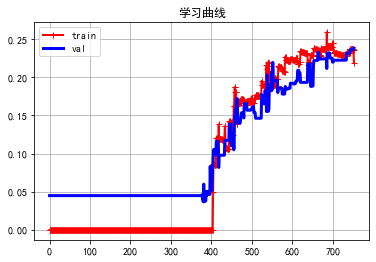

In [89]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus']=False    #解决负数坐标显示问题
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
def plot_learning_curves(model,X_train, X_test, y_train, y_test):
    X_train, X_val, y_train, y_val =X_train, X_test, y_train, y_test
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3, label="val")
    
lin_reg =AdaBoostClassifier(n_estimators=10,learning_rate=1)
plot_learning_curves(lin_reg,X_train, X_test, y_train, y_test )
plt.grid()
plt.legend()
plt.title("学习曲线")
X.shape, y.shape

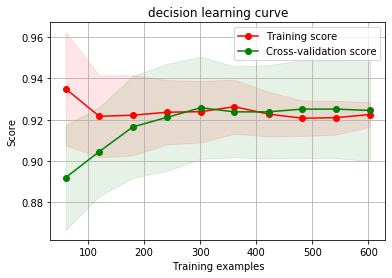

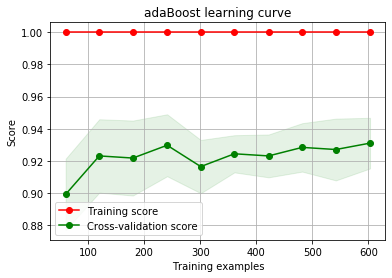

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,
                        n_jobs=None,train_sizes=np.linspace(.1,1.0,10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

from sklearn.datasets import  make_gaussian_quantiles
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# ##########################
# 生成2维正态分布，生成的数据按分位数分为两类，50个样本特征，5000个样本数据
#X,y = make_gaussian_quantiles(cov=2.0,n_samples=5000,n_features=50,n_classes=2,random_state=1)
# 设置一百折交叉验证参数，数据集分层越多，交叉最优模型越接近原模型
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=1)
# 分别画出CART分类决策树和AdaBoost分类决策树的学习曲线
estimatorCart = DecisionTreeClassifier(max_depth=1)
estimatorBoost = AdaBoostClassifier(base_estimator=estimatorCart,n_estimators=270)
# 画CART决策树和AdaBoost的学习曲线
estimatorTuple = (estimatorCart,estimatorBoost)
titleTuple =("decision learning curve","adaBoost learning curve")
title = "decision learning curve"
for i in range(2):
    estimator = estimatorTuple[i]
    title = titleTuple[i]
    plot_learning_curve(estimator,title,X_train,y_train, cv=cv)
    plt.show()

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


estimatorCart = DecisionTreeClassifier(max_depth=1)
### 第一轮
# 对框架参数 弱学习器个数进行择优
param_test1 = {"n_estimators":range(40,320,40)}
# 框架参数择优
gsearch1 = GridSearchCV(estimator=AdaBoostClassifier(estimatorCart),param_grid=param_test1,scoring="roc_auc",cv=5)
gsearch1.fit(X_train,y_train)
print(gsearch1.best_params_,gsearch1.best_score_)       # ({'n_estimators': 250}, 0.9360103999999999)

{'n_estimators': 280} 0.9787532163742689


In [109]:
### 第二轮
# 继续优化弱学习器个数，在最优学习器个数的范围内再次搜寻
n_estimator1 = 280
param_test2 = {"n_estimators":range(n_estimator1-40,n_estimator1+100,10)}
gsearch2 = GridSearchCV(estimator=AdaBoostClassifier(estimatorCart),param_grid=param_test2,scoring="roc_auc",cv=5)
gsearch2.fit(X_train,y_train)
print(gsearch2.best_params_,gsearch2.best_score_)  

{'n_estimators': 280} 0.9787532163742689


In [110]:
import numpy as np
from sklearn.model_selection import cross_validate
n_estimators2 = 280
score = 0
for i in range(1,5):  # 决策树最大深度循环
    print(i)
    for j in range(18,22):
        print(j)
        bdt=AdaBoostClassifier(DecisionTreeClassifier(max_depth=i,min_samples_split=j),n_estimators=n_estimators2)
        cv_result = cross_validate(bdt,X_train,y_train,return_train_score=False,cv=5)
        cv_value_vec = cv_result["test_score"]
        cv_mean = np.mean(cv_value_vec)
        print(cv_mean)
        if cv_mean>=score:
            score = cv_mean
            tree_depth = i
            samples_split = j

1
18
0.935055187637969
19
0.935055187637969
20
0.935055187637969
21
0.935055187637969
2
18
0.935037527593819
19
0.9323796909492273
20
0.9376865342163356
21
0.9337130242825606
3
18
0.9416423841059605
19
0.9336865342163355
20
0.9310463576158942
21
0.9310551876379691
4
18
0.9376688741721854
19
0.9336953642384106
20
0.936326710816777
21
0.9376688741721854


In [111]:
from sklearn.model_selection import train_test_split
tree_depth = 3
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=tree_depth),
                         n_estimators=n_estimators2)
bdt.fit(X_train,y_train)
print(bdt.score(X_test,y_test))

0.9764755451002423


In [130]:
import matplotlib.pyplot as plt

from sklearn.ensemble import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import  make_gaussian_quantiles
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.metrics import zero_one_loss


n_estimators = 280
estimatorCart = DecisionTreeClassifier(max_depth=3)
dt_stump1 = AdaBoostClassifier(base_estimator=estimatorCart,n_estimators=n_estimators,learning_rate=0.05)
dt_stump2 = AdaBoostClassifier(base_estimator=estimatorCart,n_estimators=n_estimators,learning_rate=0.1)
dt_stump3 = AdaBoostClassifier(base_estimator=estimatorCart,n_estimators=n_estimators,learning_rate=0.8)
dt_stump4 = AdaBoostClassifier(base_estimator=estimatorCart,n_estimators=n_estimators,learning_rate=1.5)
dt_stump1.fit(X_train,y_train)
dt_stump_err1 = 1.0 - dt_stump1.score(X_test,y_test)
dt_stump2.fit(X_train,y_train)
dt_stump_err2 = 1.0 - dt_stump2.score(X_test,y_test)
dt_stump3.fit(X_train,y_train)
dt_stump_err3 = 1.0 - dt_stump3.score(X_test,y_test)
dt_stump4.fit(X_train,y_train)
dt_stump_err4 = 1.0 - dt_stump4.score(X_test,y_test)
############
test_errors1 = []
# 每迭代一次，得到一个测试结果
ada_discrete_err1 = np.zeros((n_estimators,))
ada_discrete_err2 = np.zeros((n_estimators,))
ada_discrete_err3= np.zeros((n_estimators,))
ada_discrete_err4= np.zeros((n_estimators,))
for i,ypred in enumerate(dt_stump1.staged_predict(X_test)):
    ada_discrete_err1[i] = zero_one_loss(ypred,y_test)

for i,ypred in enumerate(dt_stump2.staged_predict(X_test)):
    ada_discrete_err2[i] = zero_one_loss(ypred,y_test)
for i,ypred in enumerate(dt_stump3.staged_predict(X_test)):
    ada_discrete_err3[i] = zero_one_loss(ypred,y_test)
for i,ypred in enumerate(dt_stump4.staged_predict(X_test)):
    ada_discrete_err4[i] = zero_one_loss(ypred,y_test)
# 画出迭代次数与准确率的关系

C:\Users\叶\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\叶\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\叶\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\叶\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


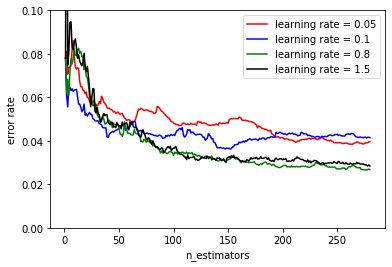

In [131]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err1,label='learning rate = 0.05',color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err2,label='learning rate = 0.1',color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err3,label='learning rate = 0.8',color='green')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err4,label='learning rate = 1.5',color='black')
ax.set_ylim((0.0, 0.1))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')
leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)
plt.show()

In [139]:
dt_stump1 = AdaBoostClassifier(base_estimator=estimatorCart,n_estimators=n_estimators,learning_rate=0.5)
dt_stump2 = AdaBoostClassifier(base_estimator=estimatorCart,n_estimators=n_estimators,learning_rate=0.7)
dt_stump3 = AdaBoostClassifier(base_estimator=estimatorCart,n_estimators=n_estimators,learning_rate=0.9)
dt_stump4 = AdaBoostClassifier(base_estimator=estimatorCart,n_estimators=n_estimators,learning_rate=1.1)
dt_stump1.fit(X_train,y_train)
dt_stump_err1 = 1.0 - dt_stump1.score(X_test,y_test)
dt_stump2.fit(X_train,y_train)
dt_stump_err2 = 1.0 - dt_stump2.score(X_test,y_test)
dt_stump3.fit(X_train,y_train)
dt_stump_err3 = 1.0 - dt_stump3.score(X_test,y_test)
dt_stump4.fit(X_train,y_train)
dt_stump_err4 = 1.0 - dt_stump4.score(X_test,y_test)
############
test_errors1 = []
# 每迭代一次，得到一个测试结果
ada_discrete_err1 = np.zeros((n_estimators,))
ada_discrete_err2 = np.zeros((n_estimators,))
ada_discrete_err3= np.zeros((n_estimators,))
ada_discrete_err4= np.zeros((n_estimators,))
for i,ypred in enumerate(dt_stump1.staged_predict(X_test)):
    ada_discrete_err1[i] = zero_one_loss(ypred,y_test)

for i,ypred in enumerate(dt_stump2.staged_predict(X_test)):
    ada_discrete_err2[i] = zero_one_loss(ypred,y_test)
for i,ypred in enumerate(dt_stump3.staged_predict(X_test)):
    ada_discrete_err3[i] = zero_one_loss(ypred,y_test)
for i,ypred in enumerate(dt_stump4.staged_predict(X_test)):
    ada_discrete_err4[i] = zero_one_loss(ypred,y_test)
# 画出迭代次数与准确率的关系

C:\Users\叶\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\叶\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\叶\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\叶\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


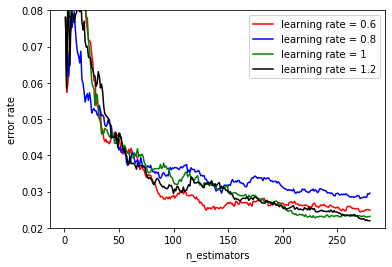

In [140]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err1,label='learning rate = 0.6',color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err2,label='learning rate = 0.8',color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err3,label='learning rate = 1',color='green')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err4,label='learning rate = 1.2',color='black')
ax.set_ylim((0.02, 0.08))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')
leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.9)
plt.show()

In [170]:
from sklearn.model_selection import GridSearchCV
parameters = {"learning_rate":[0.7,0.8,0.9,1.0,1.1,1.2,1.3]}
model =  AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=280)
grid_search = GridSearchCV(model, parameters, scoring="accuracy", cv=5)
grid_search.fit(X_train,y_train)     # 传入数据
grid_search.best_params_             # 输出参数的最优值

{'learning_rate': 1.2}

也就是说，针对本案例的数据，弱学习器的权重缩减系数设置为 0.1，最大迭代次数设置为 50，模型的预测效果最佳。

下面使用上面获得的参数最优值重新搭建模型，并传入训练集数据，代码如下：

In [171]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),learning_rate =1.2, n_estimators=280)
model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.2, n_estimators=280)

搭建完模型，然后对模型进行评估

In [172]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
score1 = accuracy_score(y_pred, y_test)
score_roc_auc = roc_auc_score(y_test,y_pred_proba[:,1])
print("模型预测准确率=",score1)
print("模型预测的AUC值=",score_roc_auc)

模型预测准确率= 0.976931989747551
模型预测的AUC值= 0.9839500535763044


In [173]:
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56847
           1       0.08      0.94      0.14       115

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.56     56962
weighted avg       1.00      0.98      0.99     56962



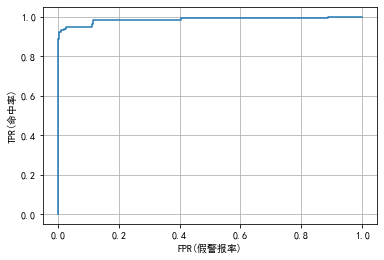

In [174]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])

import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"]   # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False     # 解决负号"-"显示为方块的问题
plt.plot(fpr,tpr)
#plt.title("图1 ROC曲线")
plt.xlabel("FPR(假警报率)")
plt.ylabel("TPR(命中率)")
plt.grid()

# ax2=plt.subplot(122)


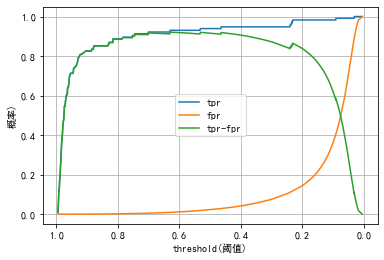

In [175]:
plt.plot(thres[1:],tpr[1:])
plt.plot(thres[1:],fpr[1:])
plt.plot(thres[1:],tpr[1:]-fpr[1:])
#plt.title("图2 KS曲线")
plt.xlabel("threshold(阈值)")
plt.ylabel("概率)")
plt.grid()
plt.legend(["tpr","fpr","tpr-fpr"])
plt.gca().invert_xaxis()

plt.subplots_adjust()
plt.show()

In [176]:
c2 = pd.DataFrame()
c2["阈值"] = list(thres)
c2["假警报率"] = list(fpr)
c2["命中率"] = list(tpr)

c2["TPR-FPR"] = c2["命中率"] - c2["假警报率"]
c2[c2["TPR-FPR"] == max(c2["TPR-FPR"])]

,阈值,假警报率,命中率,TPR-FPR
74,0.630017,0.00927,0.930435,0.921164


* **（2）贝叶斯优化（Bayes optimization)**

python用户可以采用下方命令行可以快速的安装贝叶斯调试利器—— bayesian-optimization

pip install -i https://mirrors.aliyun.com/pypi/simple bayesian-optimization

贝叶斯优化器需要定义好贝叶斯调参的目标函数，以及参数空间的范围。运行rf_op.maximize()，就可以开始用贝叶斯优化去搜索最优参数空间了

In [177]:
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
from sklearn.tree import DecisionTreeClassifier

weak_classifier = DecisionTreeClassifier(criterion='gini',
                                         max_features= 0.9,
                                         max_depth=3,
                                         splitter= 'best')

def rf_cv(n_estimators,learning_rate):
    val = cross_val_score(
        AdaBoostClassifier(base_estimator=weak_classifier,
                           n_estimators=int(n_estimators),
                           learning_rate=learning_rate
        ),
       X_train, y_train, scoring='accuracy', cv=5
    ).mean()
    return val

rf_bo = BayesianOptimization(
    rf_cv,
    {'n_estimators': (180, 350),
     'learning_rate':(0.7,1.5)})

rf_bo.maximize()

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  1        |  0.9364   |  1.454    |  212.4    |
|  2        |  0.9324   |  0.8081   |  296.5    |
|  3        |  0.935    |  0.9183   |  247.7    |
|  4        |  0.9363   |  1.256    |  298.0    |
|  5        |  0.9403   |  0.9656   |  328.6    |
|  6        |  0.9403   |  1.131    |  279.2    |
|  7        |  0.935    |  0.7531   |  327.7    |
|  8        |  0.9337   |  1.334    |  324.9    |
|  9        |  0.9364   |  0.975    |  328.7    |
|  10       |  0.9403   |  0.8362   |  284.5    |
|  11       |  0.9297   |  1.355    |  330.7    |
|  12       |  0.935    |  1.393    |  207.3    |
|  13       |  0.9337   |  0.9524   |  216.4    |
|  14       |  0.9337   |  0.9728   |  328.7    |
|  15       |  0.9416   |  1.068    |  331.1    |
|  16       |  0.935    |  1.408    |  244.1    |
|  17       |  0.935    |  1.145    |  239.1    |
|  18       |  0.9363   |  0.9757   |  265.1    |


In [178]:
print(rf_bo.max)

{'target': 0.9416423841059602, 'params': {'learning_rate': 1.1383674080365962, 'n_estimators': 237.78180251502718}}


上方是调参过程，我们可以看到，各参数空间所对应的得分，以及每个参数空间的具体数值情况。把相应最优参数代入 AdaBoost 分类模型，然后对模型进行训练和评估

In [181]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),learning_rate =1.14, n_estimators=280)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
score1 = accuracy_score(y_pred, y_test)
score_roc_auc = roc_auc_score(y_test,y_pred_proba[:,1])
print("模型预测准确率=",score1)
print("模型预测的AUC值=",score_roc_auc)

模型预测准确率= 0.978160879182613
模型预测的AUC值= 0.9895624487086236


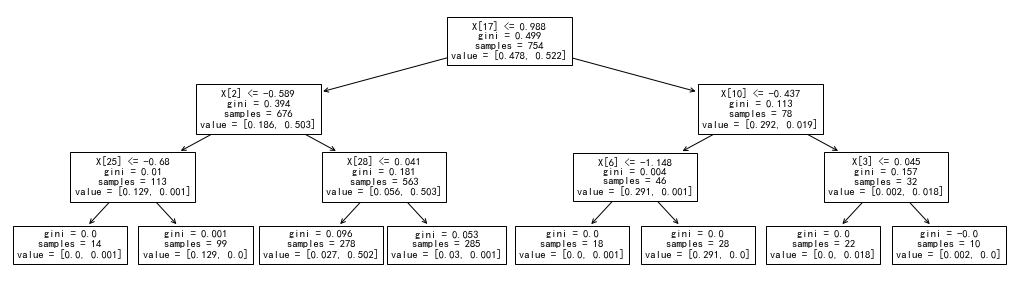

In [205]:
from sklearn import tree
plt.figure(figsize=(18,5))
_ = tree.plot_tree(model[-1])

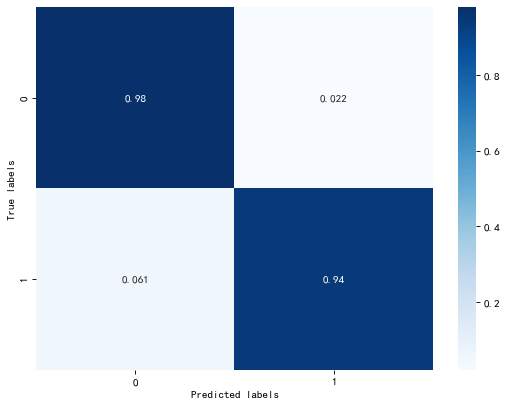

In [190]:
confusion_matrix_result = metrics.confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
confusion_matrix = confusion_matrix_result.astype('float') / confusion_matrix_result.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8,6), dpi=80)
sns.heatmap(confusion_matrix,annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [182]:
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56847
           1       0.08      0.94      0.15       115

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.57     56962
weighted avg       1.00      0.98      0.99     56962



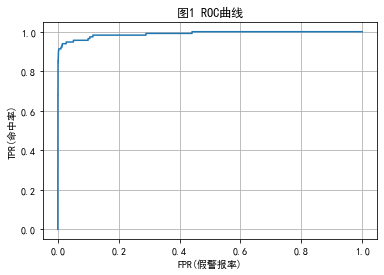

In [186]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])

import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"]   # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False     # 解决负号"-"显示为方块的问题

#ax1=plt.subplot(121)
plt.plot(fpr,tpr)
plt.title("图1 ROC曲线")
plt.xlabel("FPR(假警报率)")
plt.ylabel("TPR(命中率)")
plt.grid()

#ax2=plt.subplot(122)


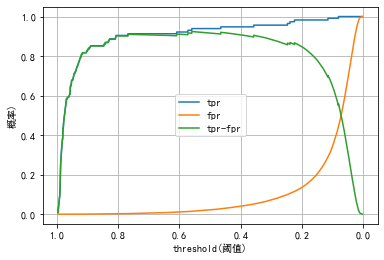

In [187]:
plt.plot(thres[1:],tpr[1:])
plt.plot(thres[1:],fpr[1:])
plt.plot(thres[1:],tpr[1:]-fpr[1:])
#plt.title(" KS曲线")
plt.xlabel("threshold(阈值)")
plt.ylabel("概率)")
plt.grid()
plt.legend(["tpr","fpr","tpr-fpr"])
plt.gca().invert_xaxis()

plt.subplots_adjust()
plt.show()

In [184]:
c2 = pd.DataFrame()
c2["阈值"] = list(thres)
c2["假警报率"] = list(fpr)
c2["命中率"] = list(tpr)

c2["TPR-FPR"] = c2["命中率"] - c2["假警报率"]
c2[c2["TPR-FPR"] == max(c2["TPR-FPR"])]

,阈值,假警报率,命中率,TPR-FPR
71,0.559451,0.014829,0.93913,0.924301


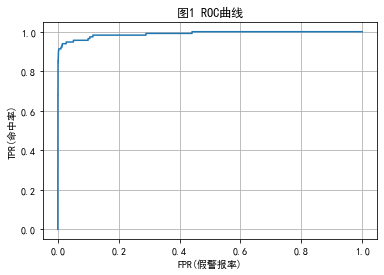

In [185]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["SimHei"]   # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False     # 解决负号"-"显示为方块的问题

plt.plot(fpr,tpr)
plt.title("图1 ROC曲线")
plt.xlabel("FPR(假警报率)")
plt.ylabel("TPR(命中率)")
plt.grid()
plt.savefig(fname="案例2-ROC曲线.png",figsize=[10,10])
plt.show()

网格搜索：遍历所以的参数组合,从而选出最优的参数组合。但是搜索空间变大之后，网格搜索的速度太慢。

贝叶斯调参的优点：

* 贝叶斯调参采用高斯过程，会考虑到之前的参数信息，不断地更新先验；网格搜索则不会考虑先验信息。
* 贝叶斯调参迭代次数少，速度快；网格搜索会遍历所有的可能的参数组合，所以速度慢,参数多时易导致维度爆炸
* 贝叶斯调参针对非凸问题依然稳健；网格搜索针对非凸问题易得到局部最优。


其实贝叶斯调参最主要的优势，是节约了算法工程师的时间和精力，这样他们就可以把更多的时间和精力用来设计出精度更高，泛化能力更强的模型，去帮助业务的提升，这也是自动调参的意义所在。